In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
 
import seaborn as sns
import json
import pandas as pd

from IPython.core.debugger import Tracer

In [2]:
def make_dataframe(filename, trial_id, stride = 1, stop_point=500):
    with open(filename) as jfile:
        dat = json.load(jfile)
    for i in range(len(dat)):
        dat[i] = [trial_id] + dat[i]
    stop_point = min(stop_point, len(dat)-5)
    dat = dat[:stop_point:stride]
    df = pd.DataFrame(dat, columns=['trial_id','wall_time', 'step', 'value'])
    return df

In [3]:
###############################################################
#### Epoch time for unconditional FFJORD on CIFAR10 ####
###############################################################

save_dir = './figures'
save_name = 'train_loss_preact1001.pdf'

#sgd
sgd = ['./data4plots/run-preresnet1001-sgd-0_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './data4plots/run-preresnet1001-sgd-1_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './data4plots/run-preresnet1001-sgd-2_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './data4plots/run-preresnet1001-sgd-3_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './data4plots/run-preresnet1001-sgd-4_train_loss_preresnet20_srsgd-tag-train_loss.json']
keys_sgd = ['run0','run1','run2', 'run3','run4']
id_sgd = 'SGD'
stop_point_sgd = 500

# srsgd
srsgd = ['./data4plots/run-preresnet1001-srsgd-0_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './data4plots/run-preresnet1001-srsgd-1_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './data4plots/run-preresnet1001-srsgd-2_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './data4plots/run-preresnet1001-srsgd-3_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './data4plots/run-preresnet1001-srsgd-4_train_loss_preresnet20_srsgd-tag-train_loss.json']
keys_srsgd = ['run0','run1','run2', 'run3','run4']
id_srsgd = 'SRSGD'
stop_point_srsgd = 500

sgd
0.0054761492647230625
0.00021070415590743972
srsgd
0.0012288142694160341
4.016246350364669e-05


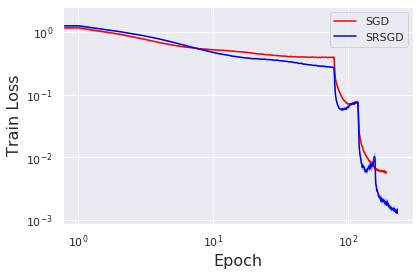

In [7]:
sns.set(style="darkgrid")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(500, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
        # print(np.argmin(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, label=trial_id, color=color)
    return sns_plot, df_min

# sns_plot, df_min_ccnf = plot_line(file_names_ccnf_bs900, keys_ccnf_bs900, id_ccnf_bs900, stride=10, stop_point=stop_point_ccnf_bs900, color='red')
# sns_plot, df_min_info = plot_line(file_names_info_bs900, keys_info_bs900, id_info_bs900, stride=10, stop_point=stop_point_info_bs900, color='green')
sns_plot, min_sgd = plot_line(sgd, keys_sgd, id_sgd, stride=1, stop_point=stop_point_sgd, color='red')
sns_plot, min_srsgd = plot_line(srsgd, keys_srsgd, id_srsgd, stride=1, stop_point=stop_point_srsgd, color='blue')
#sns_plot, df_min_infotune = plot_line(file_names_infotune_bs900, keys_infotune_bs900, id_infotune_bs900, stride=10, stop_point=stop_point_infotune_bs900, color='orange')

print('sgd')
print(np.mean(min_sgd))
print(np.std(min_sgd))

print('srsgd')
print(np.mean(min_srsgd))
print(np.std(min_srsgd))

sns_plot.set_xlabel('Epoch', fontsize = 16)
sns_plot.set_ylabel('Train Loss', fontsize = 16)
sns_plot.set(xscale="log", yscale="log")
#sns_plot.set_xlim(0,380)
#sns_plot.set_ylim(0.2,0.6)
sns_plot.legend().set_visible(True)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))